# Cycle Gan Testing Environment -BIU Deep Learning

In [ ]:
import tensorflow as tf
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image

if you struggle download our model, please upgrade gdown

In [ ]:

#!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
import gdown
url = "https://drive.google.com/u/1/uc?id=1Sk_77wBhSRhxv13ufzAEd6al1F8v1yZ0&export=download"
output = "model.zip"
gdown.download(url, output)

Downloading...
From: https://drive.google.com/u/1/uc?id=1Sk_77wBhSRhxv13ufzAEd6al1F8v1yZ0&export=download
To: /content/model.zip
100%|██████████| 202M/202M [00:05<00:00, 34.6MB/s]


'model.zip'

In [ ]:
! unzip model.zip

Archive:  model.zip
   creating: the_best_weights_ever/
  inflating: the_best_weights_ever/saved_model.pb  
   creating: the_best_weights_ever/variables/
  inflating: the_best_weights_ever/variables/variables.index  
  inflating: the_best_weights_ever/variables/variables.data-00000-of-00001  
   creating: the_best_weights_ever/assets/
 extracting: the_best_weights_ever/fingerprint.pb  
  inflating: the_best_weights_ever/keras_metadata.pb  


In [ ]:
generator = tf.keras.models.load_model('/content/the_best_weights_ever')

In [ ]:
def decode_image(image):
    #image = tf.image.decode_jpeg(image, channels=3)
    image_tensor = tf.cast(image, tf.float32)
    min_val = tf.reduce_min(image_tensor)
    max_val = tf.reduce_max(image_tensor)
    image_tensor = (image_tensor - min_val) / (max_val - min_val)
    image_tensor = tf.reshape(image_tensor, [1,320,320, 3])
    return image_tensor

upload your image here - only one image at every time!

In [ ]:
from google.colab import files
picture = files.upload()
img = Image.open(list(picture.keys())[0])
img = img.resize((320,320))
img_tensor = decode_image(img)


Saving fddc60bb99.jpg to fddc60bb99 (1).jpg


In [ ]:
output = generator(img_tensor)

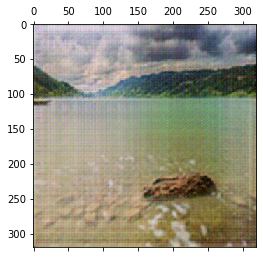

In [ ]:
plt.imshow(output[0])